# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

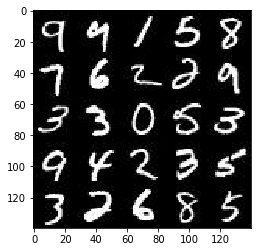

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[show_n_images:2*show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [3]:
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[show_n_images:2*show_n_images], 28, 28, 'L')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

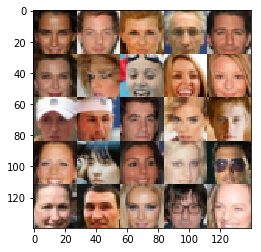

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real=tf.placeholder(tf.float32,(None,image_width, image_height, image_channels),name='inputs_real')
    inputs_z=tf.placeholder(tf.float32,(None,z_dim),name='inputs_z')
    learningrate=tf.placeholder(tf.float32,name='learningrate')
    
    

    return inputs_real, inputs_z, learningrate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        init=tf.random_normal_initializer(mean=0,stddev=0.02)
        # Input layer is 28x28x3
        h1=tf.layers.conv2d(images, 64,5,strides=2, padding='SAME',kernel_initializer=init)
        relu1=tf.maximum(alpha*h1,h1)
        # 14x14x64
        
        t1=tf.layers.conv2d(relu1,128,5,strides=2,padding="SAME",kernel_initializer=init)
        t1=tf.layers.batch_normalization(t1,training=True)
        t1=tf.maximum(alpha*t1,t1)
        t2=tf.layers.conv2d(relu1,128,3,strides=2,padding="SAME",kernel_initializer=init)
        t2=tf.layers.batch_normalization(t2,training=True)
        t2=tf.maximum(alpha*t2,t2)
        
        
        h2=tf.concat(  values=[t1, t2], axis=3)
        h2=tf.layers.dropout(h2,0.8)
        
        
        
        
        # 7x7x128
        h3=tf.layers.conv2d(h2,256,5,strides=1,padding="VALID",kernel_initializer=init)
        h3=tf.layers.batch_normalization(h3,training=True)
        relu3=tf.maximum(alpha*h3,h3)
        # 3x3x256
        
        
        relu3=tf.layers.dropout(relu3,0.8)

        # 1x1x512
        flat = tf.reshape(relu3, (-1, 3*3*256))
        
        logit=tf.layers.dense(flat,1)
        out=tf.sigmoid(logit)

    return out, logit


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True,reuse=False,alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    
    with tf.variable_scope('generator',reuse=reuse):
#     with tf.variable_scope('generator'):
    
#     with tf.variable_scope('generator', reuse=reuse):
        init=tf.random_normal_initializer(mean=0,stddev=0.02)
        h1=tf.layers.dense(z,3*3*512,kernel_initializer=init)
        h1=tf.reshape(h1,(-1,3,3,512))
        h1=tf.layers.batch_normalization(h1,training=is_train)
        h1=tf.maximum(alpha*h1,h1)
        
        
        
        
        # 3x3x512
        t1 = tf.layers.conv2d_transpose(h1, 256, 3, strides=2, padding='VALID',kernel_initializer=init)
        t1=tf.layers.batch_normalization(t1,training=is_train)
        t1=tf.maximum(alpha*t1,t1)
        
        t2 = tf.layers.conv2d_transpose(h1, 256, 3, strides=2, padding='VALID',kernel_initializer=init)
        t2=tf.layers.batch_normalization(t2,training=is_train)
        t2=tf.maximum(alpha*t2,t2)
        
        
        
        h2=tf.concat(  values=[t1, t2], axis=3)
        h2=tf.layers.dropout(h2,0.8)
#         print(h2,t1)
        
        # 7x7x256
        h3 = tf.layers.conv2d_transpose(h2, 128, 3, strides=2, padding='SAME',kernel_initializer=init)
        h3=tf.layers.batch_normalization(h3,training=is_train)
        h3=tf.maximum(alpha*h3,h3)
        h3=tf.layers.dropout(h3,0.8)
        # 14x14x128
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 3, strides=2, padding='SAME',kernel_initializer=init)
        # 28x28x3
        out=tf.tanh(logits)
        tf.summary.image('gen',out,3)
        # 28x28x3
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.01):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model=generator(input_z,out_channel_dim=out_channel_dim,is_train=True,alpha = 0.01)
    d_model_real,d_logits_real=discriminator(input_real,alpha = 0.01)
    d_model_fake,d_logits_fake=discriminator(g_model,reuse=True,alpha = 0.01)
    
    
    d_loss_real=tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_logits_real)* 0.9))
    d_loss_fake=tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_logits_fake)))
    
    
    g_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_logits_fake)*0.9))
    d_loss=d_loss_real+d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_var=tf.trainable_variables()
    d_var=[var for var in t_var if var.name.startswith('discriminator')]
    g_var=[var for var in t_var if var.name.startswith('generator')]
    
    d_train_op=tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(d_loss,var_list=d_var)
    g_train_op=tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(g_loss,var_list=g_var)
    
    
    return d_train_op, g_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,alpha,writer):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width, image_height, image_channels=data_shape[1:]
    
    input_real, input_z,learningrate=model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss=model_loss(input_real, input_z, image_channels,alpha=alpha)
    d_train_op, g_train_op=model_opt(d_loss, g_loss, learningrate, beta1)
    

    saver = tf.train.Saver()
    
    steps = 0
    sc=1
    with tf.Session() as sess:
        tf.summary.scalar('d_loss',d_loss)
        tf.summary.scalar('g_loss',g_loss)
        merge_summary=tf.summary.merge_all()
        sess.run(tf.global_variables_initializer())
        
        writer.add_graph(sess.graph)
        for epoch_i in range(epoch_count):
            
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1

                
                
                batch_z = np.random.uniform(-1, 1, size=(1*batch_size, z_dim))
                batch_images=batch_images*2
                train_loss_d,_ = sess.run([d_loss,d_train_op], feed_dict={input_real: batch_images, input_z: batch_z,learningrate:learning_rate})
                train_loss_g,_ = sess.run([g_loss,g_train_op], feed_dict={input_z: batch_z,learningrate:learning_rate})
                if train_loss_d>train_loss_g:
                    sess.run(d_train_op, feed_dict={input_real: batch_images, input_z: batch_z,learningrate:learning_rate})
                else:
                    sess.run(g_train_op, feed_dict={input_z: batch_z,learningrate:learning_rate})
                if steps % 100 == 0:
                    pass
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                if steps % 20 == 0:
                    

                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = sess.run(g_loss, {input_z: batch_z})
                    s=sess.run(merge_summary,{input_z: batch_z, input_real: batch_images})
                    writer.add_summary(s,steps)

                    

                    print("Step : {} Epoch {}/{}...".format(steps,epoch_i+1, epoch_count),
                  "Discriminator Loss: {:.4f}...".format(train_loss_d),
                  "Generator Loss: {:.4f}".format(train_loss_g)) 
                    losses.append((train_loss_d, train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [13]:
!rm -r /tmp/gan

Step : 20 Epoch 1/2... Discriminator Loss: 0.3893... Generator Loss: 3.7953
Step : 40 Epoch 1/2... Discriminator Loss: 0.4616... Generator Loss: 5.9352
Step : 60 Epoch 1/2... Discriminator Loss: 0.7705... Generator Loss: 2.1671
Step : 80 Epoch 1/2... Discriminator Loss: 0.8374... Generator Loss: 1.4532


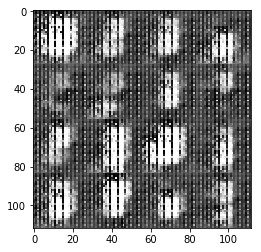

Step : 100 Epoch 1/2... Discriminator Loss: 0.4476... Generator Loss: 3.0165
Step : 120 Epoch 1/2... Discriminator Loss: 0.5003... Generator Loss: 2.7938
Step : 140 Epoch 1/2... Discriminator Loss: 0.7852... Generator Loss: 1.4652
Step : 160 Epoch 1/2... Discriminator Loss: 0.5870... Generator Loss: 2.3257
Step : 180 Epoch 1/2... Discriminator Loss: 0.7667... Generator Loss: 2.0997


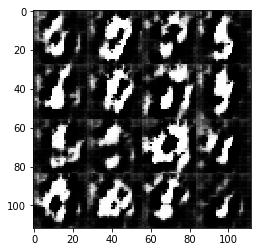

Step : 200 Epoch 1/2... Discriminator Loss: 1.0606... Generator Loss: 1.5365
Step : 220 Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 1.5492
Step : 240 Epoch 1/2... Discriminator Loss: 0.7219... Generator Loss: 2.4748
Step : 260 Epoch 1/2... Discriminator Loss: 1.0058... Generator Loss: 1.0003
Step : 280 Epoch 1/2... Discriminator Loss: 1.0753... Generator Loss: 0.8631


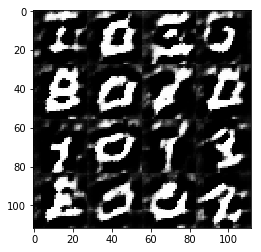

Step : 300 Epoch 1/2... Discriminator Loss: 0.8799... Generator Loss: 1.4123
Step : 320 Epoch 1/2... Discriminator Loss: 0.9984... Generator Loss: 1.3809
Step : 340 Epoch 1/2... Discriminator Loss: 0.9786... Generator Loss: 1.1748
Step : 360 Epoch 1/2... Discriminator Loss: 0.9811... Generator Loss: 1.6599
Step : 380 Epoch 1/2... Discriminator Loss: 1.0949... Generator Loss: 1.0197


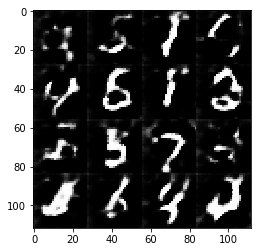

Step : 400 Epoch 1/2... Discriminator Loss: 0.7111... Generator Loss: 1.9024
Step : 420 Epoch 1/2... Discriminator Loss: 0.9352... Generator Loss: 1.3331
Step : 440 Epoch 1/2... Discriminator Loss: 1.1114... Generator Loss: 0.8893
Step : 460 Epoch 1/2... Discriminator Loss: 1.1237... Generator Loss: 0.8178
Step : 480 Epoch 1/2... Discriminator Loss: 1.7744... Generator Loss: 2.5538


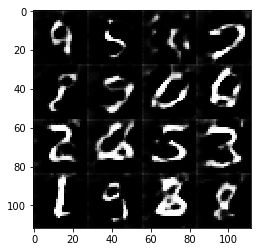

Step : 500 Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 0.9648
Step : 520 Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 1.2023
Step : 540 Epoch 1/2... Discriminator Loss: 1.0614... Generator Loss: 0.8822
Step : 560 Epoch 1/2... Discriminator Loss: 1.1953... Generator Loss: 1.3839
Step : 580 Epoch 1/2... Discriminator Loss: 1.0850... Generator Loss: 1.0055


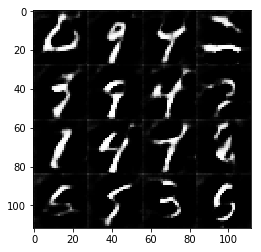

Step : 600 Epoch 1/2... Discriminator Loss: 1.2826... Generator Loss: 0.9486
Step : 620 Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 0.9828
Step : 640 Epoch 2/2... Discriminator Loss: 1.1264... Generator Loss: 0.8902
Step : 660 Epoch 2/2... Discriminator Loss: 0.9644... Generator Loss: 1.1865
Step : 680 Epoch 2/2... Discriminator Loss: 1.1648... Generator Loss: 0.9085


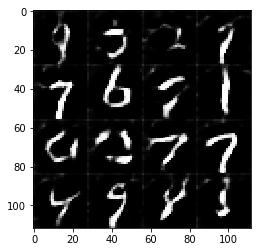

Step : 700 Epoch 2/2... Discriminator Loss: 1.1051... Generator Loss: 1.2587
Step : 720 Epoch 2/2... Discriminator Loss: 1.1761... Generator Loss: 1.0161
Step : 740 Epoch 2/2... Discriminator Loss: 1.2089... Generator Loss: 1.0644
Step : 760 Epoch 2/2... Discriminator Loss: 1.2869... Generator Loss: 0.6562
Step : 780 Epoch 2/2... Discriminator Loss: 1.0721... Generator Loss: 1.3127


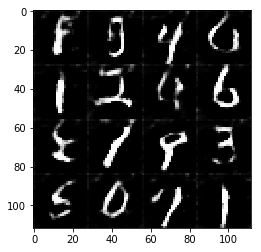

Step : 800 Epoch 2/2... Discriminator Loss: 1.1440... Generator Loss: 0.9092
Step : 820 Epoch 2/2... Discriminator Loss: 0.8647... Generator Loss: 1.3071
Step : 840 Epoch 2/2... Discriminator Loss: 1.2657... Generator Loss: 0.7904
Step : 860 Epoch 2/2... Discriminator Loss: 1.1219... Generator Loss: 0.9028
Step : 880 Epoch 2/2... Discriminator Loss: 1.0233... Generator Loss: 1.0713


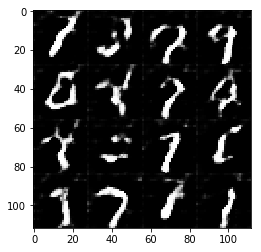

Step : 900 Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 1.2619
Step : 920 Epoch 2/2... Discriminator Loss: 1.0880... Generator Loss: 1.1667
Step : 940 Epoch 2/2... Discriminator Loss: 1.1910... Generator Loss: 0.7760
Step : 960 Epoch 2/2... Discriminator Loss: 1.2182... Generator Loss: 0.8325
Step : 980 Epoch 2/2... Discriminator Loss: 1.2859... Generator Loss: 0.7505


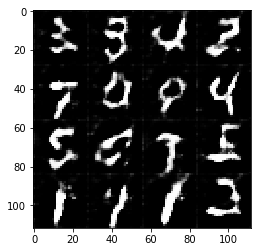

Step : 1000 Epoch 2/2... Discriminator Loss: 1.2346... Generator Loss: 1.1145
Step : 1020 Epoch 2/2... Discriminator Loss: 1.3505... Generator Loss: 0.6833
Step : 1040 Epoch 2/2... Discriminator Loss: 1.1646... Generator Loss: 0.7986
Step : 1060 Epoch 2/2... Discriminator Loss: 1.4418... Generator Loss: 0.6031
Step : 1080 Epoch 2/2... Discriminator Loss: 1.1206... Generator Loss: 0.8218


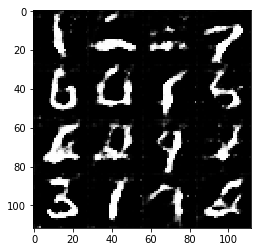

Step : 1100 Epoch 2/2... Discriminator Loss: 1.0901... Generator Loss: 0.9344
Step : 1120 Epoch 2/2... Discriminator Loss: 1.2058... Generator Loss: 0.7600
Step : 1140 Epoch 2/2... Discriminator Loss: 1.1488... Generator Loss: 1.0666
Step : 1160 Epoch 2/2... Discriminator Loss: 1.2866... Generator Loss: 0.7015
Step : 1180 Epoch 2/2... Discriminator Loss: 1.2869... Generator Loss: 0.9204


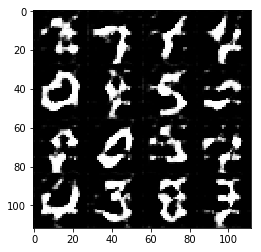

Step : 1200 Epoch 2/2... Discriminator Loss: 1.0005... Generator Loss: 0.9648
Step : 1220 Epoch 2/2... Discriminator Loss: 0.9988... Generator Loss: 0.9833
Step : 1240 Epoch 2/2... Discriminator Loss: 1.3656... Generator Loss: 0.6454


In [18]:
batch_size = 96
z_dim = 64
learning_rate = 0.0008
beta1 = 0.7
alpha=0.2


losses = []
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2
writer=tf.summary.FileWriter('/tmp/gan/mnist')
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode,alpha,writer)

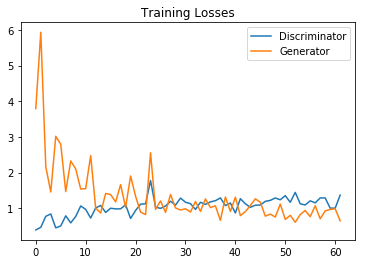

In [19]:
fig, ax = pyplot.subplots()
losses = np.array(losses)
pyplot.plot(losses.T[0], label='Discriminator')
pyplot.plot(losses.T[1], label='Generator')
pyplot.title("Training Losses")
pyplot.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Step : 20 Epoch 1/1... Discriminator Loss: 0.4623... Generator Loss: 2.6661
Step : 40 Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 7.5305
Step : 60 Epoch 1/1... Discriminator Loss: 1.7279... Generator Loss: 0.7614
Step : 80 Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 1.4362


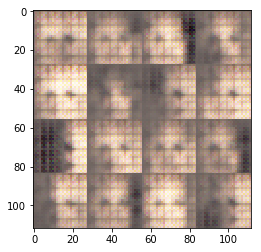

Step : 100 Epoch 1/1... Discriminator Loss: 1.6326... Generator Loss: 0.8296
Step : 120 Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.7771
Step : 140 Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 1.7500
Step : 160 Epoch 1/1... Discriminator Loss: 1.2834... Generator Loss: 0.9152
Step : 180 Epoch 1/1... Discriminator Loss: 1.4923... Generator Loss: 0.7593


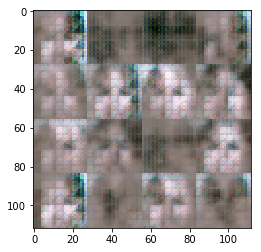

Step : 200 Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.7976
Step : 220 Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.9793
Step : 240 Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 1.1074
Step : 260 Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 1.0189
Step : 280 Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 0.9253


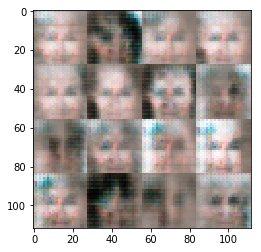

Step : 300 Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.7224
Step : 320 Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.8886
Step : 340 Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.8670
Step : 360 Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.9616
Step : 380 Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.6946


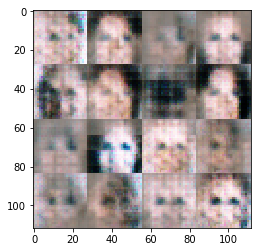

Step : 400 Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 1.0896
Step : 420 Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6947
Step : 440 Epoch 1/1... Discriminator Loss: 1.5794... Generator Loss: 0.6589
Step : 460 Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.7561
Step : 480 Epoch 1/1... Discriminator Loss: 1.0934... Generator Loss: 1.1771


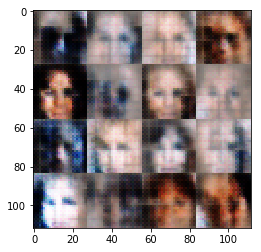

Step : 500 Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.3390
Step : 520 Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.8350
Step : 540 Epoch 1/1... Discriminator Loss: 1.4476... Generator Loss: 0.6222
Step : 560 Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.3182
Step : 580 Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.7748


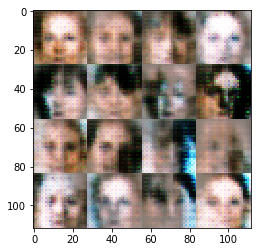

Step : 600 Epoch 1/1... Discriminator Loss: 0.8554... Generator Loss: 1.4326
Step : 620 Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.9043
Step : 640 Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.8382
Step : 660 Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.7757
Step : 680 Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.7211


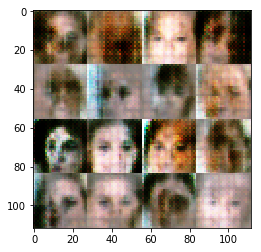

Step : 700 Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 0.7944
Step : 720 Epoch 1/1... Discriminator Loss: 1.7683... Generator Loss: 0.6210
Step : 740 Epoch 1/1... Discriminator Loss: 1.6420... Generator Loss: 0.8306
Step : 760 Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7425
Step : 780 Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.8722


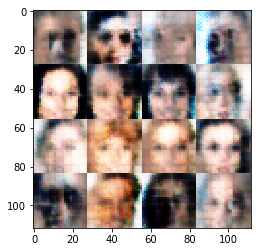

Step : 800 Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.8262
Step : 820 Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 0.7899
Step : 840 Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.7148
Step : 860 Epoch 1/1... Discriminator Loss: 1.4972... Generator Loss: 0.8646
Step : 880 Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.7165


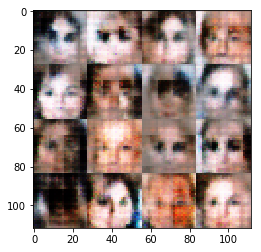

Step : 900 Epoch 1/1... Discriminator Loss: 1.5522... Generator Loss: 0.7768
Step : 920 Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 1.0181
Step : 940 Epoch 1/1... Discriminator Loss: 1.5850... Generator Loss: 0.6784
Step : 960 Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 0.6518
Step : 980 Epoch 1/1... Discriminator Loss: 0.9697... Generator Loss: 1.2484


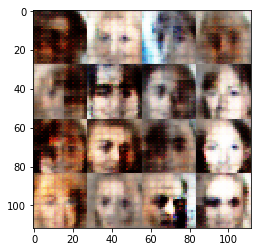

Step : 1000 Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.9257
Step : 1020 Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.8918
Step : 1040 Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.7770
Step : 1060 Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.7625
Step : 1080 Epoch 1/1... Discriminator Loss: 0.9460... Generator Loss: 1.3987


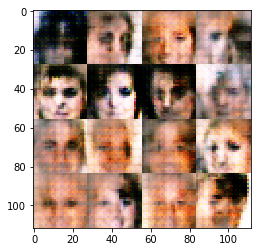

Step : 1100 Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 0.8372
Step : 1120 Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.7983
Step : 1140 Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.6506
Step : 1160 Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7427
Step : 1180 Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.7746


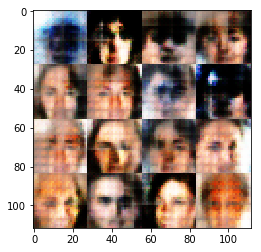

Step : 1200 Epoch 1/1... Discriminator Loss: 0.9047... Generator Loss: 1.4916
Step : 1220 Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.7649
Step : 1240 Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.8436
Step : 1260 Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 0.7268
Step : 1280 Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.8075


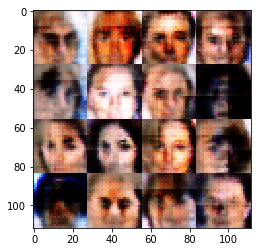

Step : 1300 Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.8624
Step : 1320 Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 1.2833
Step : 1340 Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.9211
Step : 1360 Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.7746
Step : 1380 Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.9134


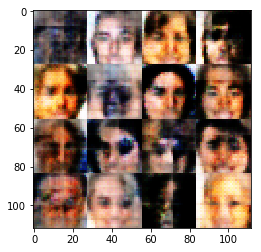

Step : 1400 Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.7890
Step : 1420 Epoch 1/1... Discriminator Loss: 1.4437... Generator Loss: 0.6754
Step : 1440 Epoch 1/1... Discriminator Loss: 1.1047... Generator Loss: 0.8705
Step : 1460 Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.7338
Step : 1480 Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.7514


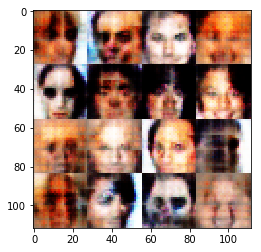

Step : 1500 Epoch 1/1... Discriminator Loss: 1.1643... Generator Loss: 0.8055
Step : 1520 Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.6873
Step : 1540 Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.7625
Step : 1560 Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6421
Step : 1580 Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.8283


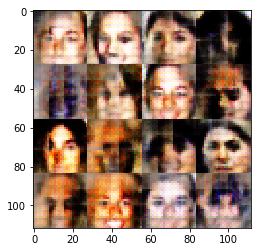

Step : 1600 Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 1.5574
Step : 1620 Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.7386
Step : 1640 Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.7621
Step : 1660 Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.7956
Step : 1680 Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 1.0725


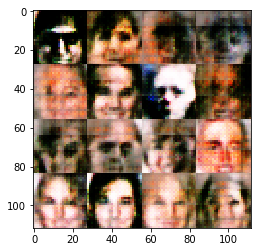

Step : 1700 Epoch 1/1... Discriminator Loss: 1.4997... Generator Loss: 0.8706
Step : 1720 Epoch 1/1... Discriminator Loss: 0.8820... Generator Loss: 1.2231
Step : 1740 Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.8127
Step : 1760 Epoch 1/1... Discriminator Loss: 1.2643... Generator Loss: 0.7479
Step : 1780 Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7625


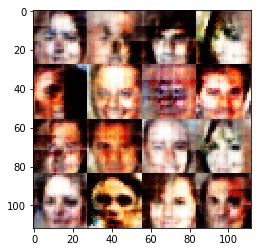

Step : 1800 Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.7544
Step : 1820 Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.7769
Step : 1840 Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.7712
Step : 1860 Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 1.2965
Step : 1880 Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.7143


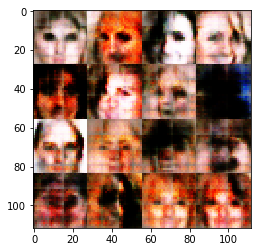

Step : 1900 Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.6238
Step : 1920 Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.7843
Step : 1940 Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 1.5100
Step : 1960 Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.4624
Step : 1980 Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.7093


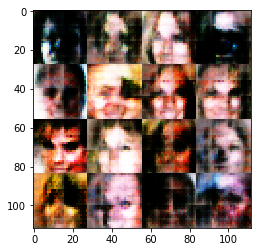

Step : 2000 Epoch 1/1... Discriminator Loss: 1.5778... Generator Loss: 0.7698
Step : 2020 Epoch 1/1... Discriminator Loss: 1.5046... Generator Loss: 0.6769
Step : 2040 Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.8077
Step : 2060 Epoch 1/1... Discriminator Loss: 1.4280... Generator Loss: 0.7311
Step : 2080 Epoch 1/1... Discriminator Loss: 1.2476... Generator Loss: 0.9258


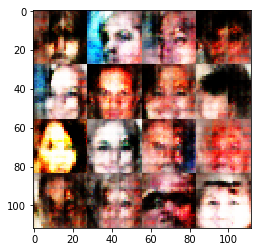

Step : 2100 Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.7280
Step : 2120 Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 1.2496
Step : 2140 Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.8804
Step : 2160 Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.6632
Step : 2180 Epoch 1/1... Discriminator Loss: 1.6548... Generator Loss: 0.5887


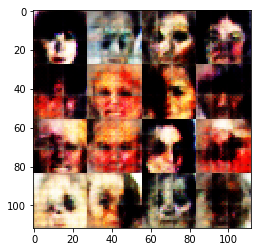

Step : 2200 Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 0.7705
Step : 2220 Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.3400
Step : 2240 Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.9028
Step : 2260 Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7377
Step : 2280 Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.7927


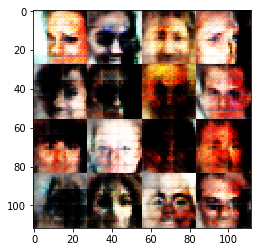

Step : 2300 Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6766
Step : 2320 Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.7774
Step : 2340 Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.7277
Step : 2360 Epoch 1/1... Discriminator Loss: 0.8626... Generator Loss: 1.3376
Step : 2380 Epoch 1/1... Discriminator Loss: 0.9634... Generator Loss: 1.2652


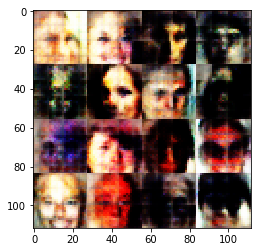

Step : 2400 Epoch 1/1... Discriminator Loss: 1.1639... Generator Loss: 0.9113
Step : 2420 Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.7090
Step : 2440 Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.1850
Step : 2460 Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.4745
Step : 2480 Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.5682


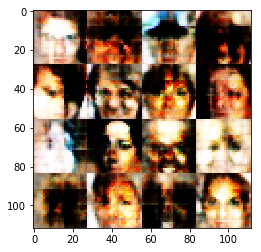

Step : 2500 Epoch 1/1... Discriminator Loss: 0.8006... Generator Loss: 1.3765
Step : 2520 Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.7712
Step : 2540 Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.6293
Step : 2560 Epoch 1/1... Discriminator Loss: 1.5413... Generator Loss: 0.8098
Step : 2580 Epoch 1/1... Discriminator Loss: 0.9296... Generator Loss: 1.4047


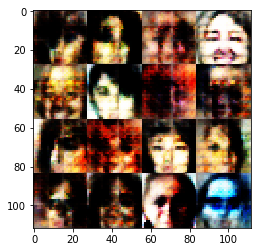

Step : 2600 Epoch 1/1... Discriminator Loss: 1.5560... Generator Loss: 0.6222
Step : 2620 Epoch 1/1... Discriminator Loss: 1.4891... Generator Loss: 0.7237
Step : 2640 Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6429
Step : 2660 Epoch 1/1... Discriminator Loss: 1.5489... Generator Loss: 0.5791
Step : 2680 Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.6650


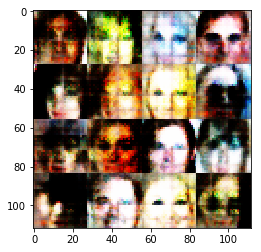

Step : 2700 Epoch 1/1... Discriminator Loss: 0.9036... Generator Loss: 1.3457
Step : 2720 Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.7879
Step : 2740 Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 0.6862
Step : 2760 Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.6891
Step : 2780 Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.6866


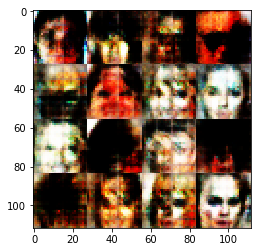

Step : 2800 Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7260
Step : 2820 Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.6420
Step : 2840 Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6724
Step : 2860 Epoch 1/1... Discriminator Loss: 0.9698... Generator Loss: 1.2301
Step : 2880 Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.6733


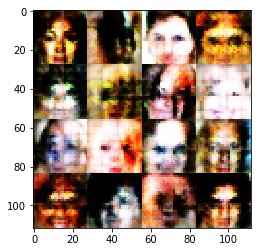

Step : 2900 Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.7863
Step : 2920 Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.6972
Step : 2940 Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 1.6534
Step : 2960 Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.7158
Step : 2980 Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6681


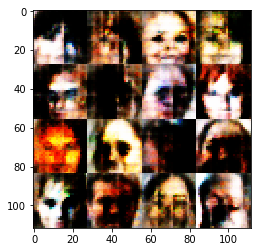

Step : 3000 Epoch 1/1... Discriminator Loss: 1.5362... Generator Loss: 0.6672
Step : 3020 Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 0.8234
Step : 3040 Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.7129
Step : 3060 Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.7983
Step : 3080 Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.6264


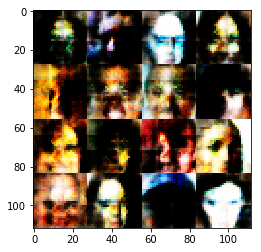

Step : 3100 Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 0.8848
Step : 3120 Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.6988
Step : 3140 Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 1.2818
Step : 3160 Epoch 1/1... Discriminator Loss: 1.5884... Generator Loss: 0.6350


In [20]:
batch_size = 64
z_dim = 144
learning_rate = 0.0006
beta1 = 0.7
alpha=0.2

losses = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1
writer=tf.summary.FileWriter('/tmp/gan/face')
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode,alpha,writer)


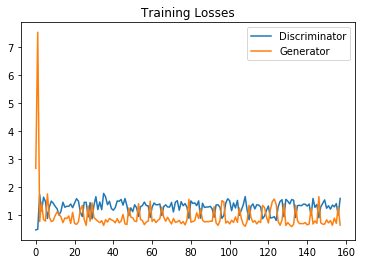

In [21]:
fig, ax = pyplot.subplots()
losses = np.array(losses)
pyplot.plot(losses.T[0], label='Discriminator')
pyplot.plot(losses.T[1], label='Generator')
pyplot.title("Training Losses")
pyplot.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.